# Mobile Net Demo

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import grpc
import hydro_serving_grpc as hs
from PIL import Image

## 1. Load an image

In [2]:
img = Image.open("demo_image.jpg")
img = img.resize((224, 224))
img_arr = np.array(img, dtype=np.float)[np.newaxis]

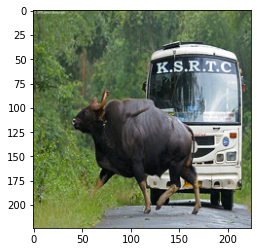

In [3]:
plt.imshow(img)

## 2. Perform inference

In [5]:
from hydrosdk import Cluster, Application
import grpc

In [6]:
cluster = Cluster(
    http_address="<hydrosphere-http-address>",
    grpc_address="<hydrosphere-grpc-address>",
    ssl=True,                                         # turn off, if your Hydrosphere instance doesn't have
    grpc_credentials=grpc.ssl_channel_credentials()   # TLS certificates installed
)

In [7]:
app = Application.find(cluster, "<application-name>")
app.lock_while_starting()
predictor = app.predictor()

In [8]:
result = predictor.predict({"input": img_arr})

In [10]:
result["classes"]

array([345])